In [1]:
%matplotlib inline 
import xarray as xr
import numpy as np
import os 

import xesmf as xe 

In [2]:
domain = xr.open_dataset(os.path.join('/home/jovyan/downscaling/downscale', 'domain.1x1.nc'))

In [3]:
test_grib = xr.open_dataset("/gcs/impactlab-data/climate/source_data/ERA-5/hourly/precip_grib/total_precip_2012_06_06.grib", 
                            engine='cfgrib')

In [4]:
test_grib['tp']

<xarray.DataArray 'tp' (time: 3, step: 12, latitude: 721, longitude: 1440)>
[37376640 values with dtype=float32]
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2012-06-05T18:00:00 ... 2012-06-06T18:0...
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 11:00:00 12:00:00
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time, step) datetime64[ns] ...
Attributes: (12/30)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_shortName:                           tp
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown

In [5]:
test_grib['tp'].valid_time

<xarray.DataArray 'valid_time' (time: 3, step: 12)>
array([['2012-06-05T19:00:00.000000000', '2012-06-05T20:00:00.000000000',
        '2012-06-05T21:00:00.000000000', '2012-06-05T22:00:00.000000000',
        '2012-06-05T23:00:00.000000000', '2012-06-06T00:00:00.000000000',
        '2012-06-06T01:00:00.000000000', '2012-06-06T02:00:00.000000000',
        '2012-06-06T03:00:00.000000000', '2012-06-06T04:00:00.000000000',
        '2012-06-06T05:00:00.000000000', '2012-06-06T06:00:00.000000000'],
       ['2012-06-06T07:00:00.000000000', '2012-06-06T08:00:00.000000000',
        '2012-06-06T09:00:00.000000000', '2012-06-06T10:00:00.000000000',
        '2012-06-06T11:00:00.000000000', '2012-06-06T12:00:00.000000000',
        '2012-06-06T13:00:00.000000000', '2012-06-06T14:00:00.000000000',
        '2012-06-06T15:00:00.000000000', '2012-06-06T16:00:00.000000000',
        '2012-06-06T17:00:00.000000000', '2012-06-06T18:00:00.000000000'],
       ['2012-06-06T19:00:00.000000000', '2012-06-06T20:00:00.000000000',
        '2012-06-06T21:00:00.000000000', '2012-06-06T22:00:00.000000000',
        '2012-06-06T23:00:00.000000000', '2012-06-07T00:00:00.000000000',
        '2012-06-07T01:00:00.000000000', '2012-06-07T02:00:00.000000000',
        '2012-06-07T03:00:00.000000000', '2012-06-07T04:00:00.000000000',
        '2012-06-07T05:00:00.000000000', '2012-06-07T06:00:00.000000000']],
      dtype='datetime64[ns]')
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2012-06-05T18:00:00 ... 2012-06-06T18:0...
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 11:00:00 12:00:00
    surface     float64 0.0
    valid_time  (time, step) datetime64[ns] 2012-06-05T19:00:00 ... 2012-06-0...
Attributes:
    standard_name:  time
    long_name:      time

In [6]:
test_netcdf = xr.open_dataset("/gcs/impactlab-data/climate/source_data/ERA-5/day/precip_total/v1.2/intermediate/1984/precip_total_1984-01-01.nc")

In [7]:
# test['tp'].isel(valid_time=np.arange(6, 24))
# test.valid_time.dt.day
test_netcdf['precip_total']

<xarray.DataArray 'precip_total' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    time       datetime64[ns] ...
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes:
    version:  v1.2
    author:   Meredith Fish
    contact:  meredith.fish@rutgers.edu
    project:  historical-climate-data-diagnostics
    source:   era5_hourly_reanalysis_single_levels_sa from Pangeo Datastore, ...
    created:  2021-03-22
    method:   sum of precip_total
    units:    m

In [ ]:
! pip install cdsapi

In [ ]:
import cdsapi 

In [ ]:
c = cdsapi.Client()

In [ ]:
'''c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'temperature',
        'year': '2008',
        'month': '01',
        'day': '01',
        'time': '12:00',
        'format': 'grib',                 # Supported format: grib and netcdf. Default: grib
        'grid'          : 'N320',       # Latitude/longitude grid.           Default: 0.25 x 0.25
    },
    'era5_temperature_sub_area.grib') '''

'''c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type':'reanalysis',
        'variable':'2m_temperature',
        'year':'2000',
        'month':'01',
        'day':'03',
        'time':'12:00',
        'format':'grib',
        'grid': 'n320'
    },
    'era5_temp_test_n320.nc')'''

In [22]:
u = xr.open_dataset('era5_temp_test_f320.grib', engine='cfgrib')
# u = xr.open_dataset('era5_temp_test_f320.nc')

In [23]:
u.dims

Frozen(SortedKeysDict({'latitude': 640, 'longitude': 1280}))

In [5]:
print(np.diff(u.latitude.values).min())
print(np.diff(u.latitude.values).max())

print(np.diff(u.longitude.values).min())
print(np.diff(u.longitude.values).max())

-0.28103638
-0.27867126
0.28125
0.28128052


In [6]:
v = xr.open_dataset('era5_temp_test_n320.grib', engine='cfgrib')

In [7]:
print(np.diff(v.latitude.values).min())
print(np.diff(v.latitude.values).max())

print(np.diff(v.longitude.values).min())
print(np.diff(v.longitude.values).max())

-0.2810303593350064
0.0
-359.71875
20.0


In [8]:
v.longitude.values[:20]

array([  0. ,  20. ,  40. ,  60. ,  80. , 100. , 120. , 140. , 160. ,
       180. , 200. , 220. , 240. , 260. , 280. , 300. , 320. , 340. ,
         0. ,  14.4])

In [9]:
w = xr.open_dataset('era5_temp_test_0p28125.nc')
w

<xarray.Dataset>
Dimensions:    (latitude: 641, longitude: 1280, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.2813 0.5625 ... 359.2 359.4 359.7
  * latitude   (latitude) float32 90.0 89.72 89.44 89.16 ... -89.44 -89.72 -90.0
  * time       (time) datetime64[ns] 2000-01-03T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-06 17:08:50 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

try regridding 

In [11]:
regridder = xe.Regridder(u.rename({'latitude': 'lat', 'longitude': 'lon'}), domain, method='bilinear')

In [12]:
smoke_native = regridder(u)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xesmf/frontend.py:531: UserWarning: Using dimensions ('latitude', 'longitude') from data variable t2m as the horizontal dimensions for the regridding.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.8/site-packages/xesmf/frontend.py:496: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


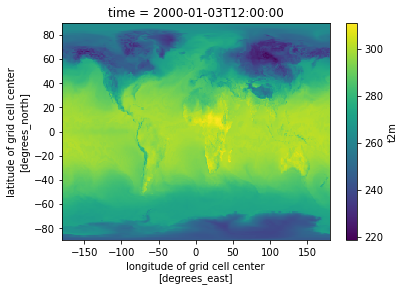

In [14]:
smoke_native['t2m'].isel(time=0).plot()

In [19]:
v_updated = v.assign_coords({"latitude": v.latitude.values}).assign_coords({"longitude": v.longitude.values})

In [21]:
u

<xarray.Dataset>
Dimensions:    (latitude: 640, longitude: 1280, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.2813 0.5625 ... 359.2 359.4 359.7
  * latitude   (latitude) float32 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * time       (time) datetime64[ns] 2000-01-03T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 264.4 264.4 ... 245.2 245.2
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-06 17:03:48 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...